# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# run a for loop to create each of the variables
url = "http://api.openweathermap.org/data/2.5/weather?q="

names = []
country = []
dt = []
temperature = []
latitude = []
longitude = []
humidity = []
cloudiness = []
wind_speed = []

for city in cities:
    query_url = url + city + "&units=imperial&appid=" + weather_api_key
    # print(query_url)
    weather = requests.get(query_url).json()
    try:
        name = weather["name"]
        number = weather["id"]
        print(f"City: {name}, Number: {number}")
        names.append(name)
        temperature.append(weather["main"]["temp_max"])
        country.append(weather["sys"]["country"])
        dt.append(weather["dt"])
        latitude.append(weather["coord"]["lat"])
        longitude.append(weather["coord"]["lon"])
        humidity.append(weather["main"]["humidity"])
        cloudiness.append(weather["clouds"]["all"])
        wind_speed.append(weather["wind"]["speed"])
        time.sleep(3)
    except:
        print("City not found")
        names.append("")
        temperature.append("")
        country.append("")
        dt.append("")
        latitude.append("")
        longitude.append("")
        humidity.append("")
        cloudiness.append("")
        wind_speed.append("")
        pass

City: Shahrud, Number: 135423
City: Ushuaia, Number: 3833367
City: Kafue, Number: 915883
City: Tateyama, Number: 1850523
City: Yaan, Number: 2338660
City: Batagay-Alyta, Number: 2027042
City: Nome, Number: 5870133
City: Tiksi, Number: 2015306
City: Bar Harbor, Number: 4957320
City: Cabo San Lucas, Number: 3985710
City not found
City: San Gabriel, Number: 5392034
City: Bredasdorp, Number: 1015776
City: São José da Coroa Grande, Number: 3388456
City: Yellowknife, Number: 6185377
City: Rikitea, Number: 4030556
City: Jamestown, Number: 5122534
City: Wau, Number: 363885
City: Puerto Ayora, Number: 3652764
City: Whitehorse, Number: 6180550
City: Pareora, Number: 2181133
City: San Cristobal, Number: 3628473
City: Barrow, Number: 5880054
City: Orneta, Number: 763066
City: Dikson, Number: 1507390
City: Busselton, Number: 2075265
City: Luwuk, Number: 1637001
City: Port Lincoln, Number: 2063036
City: Saint George, Number: 5546220
City: Katsuura, Number: 2112309
City not found
City: Katobu, Number

City: Port Alfred, Number: 964432
City: Rocha, Number: 3440777
City: Sangar, Number: 2017215
City: Itaguaçu, Number: 3460901
City: Darhan, Number: 2031964
City: Souillac, Number: 933995
City: Touros, Number: 3386213
City: Vila do Maio, Number: 3374120
City: Pekalongan, Number: 1631766
City: Saint-Augustin, Number: 6137462
City: Manicoré, Number: 3663503
City: Spring Valley, Number: 5512909
City: São Félix do Xingu, Number: 3388847
City: Bilma, Number: 2446796
City: Colgong, Number: 1273856
City: Honiara, Number: 2108502
City: Auki, Number: 2109701
City: Mbour, Number: 2248477
City not found
City: São João da Barra, Number: 3448903
City: Buchanan, Number: 2278158
City: Safi, Number: 2537881
City: Neryungri, Number: 2019309
City: Atar, Number: 2381334
City: La Ronge, Number: 6050066
City: College, Number: 5859699
City: Campbellsville, Number: 4286717
City: Geraldton, Number: 2070998
City: Laguna, Number: 5364271
City: Mount Gambier, Number: 2156643
City: Havre-St-Pierre, Number: 5972291


City: Suntar, Number: 2015913
City: Noormarkku, Number: 644436
City: Beringovskiy, Number: 2126710
City: Vanderhoof, Number: 6173361
City: Kidal, Number: 2455290
City: Mumford, Number: 2297810
City: Paramonga, Number: 3933024
City: Chicama, Number: 3698359
City: Garhiyasin, Number: 1178843
City: Moranbah, Number: 6533368
City: Amahai, Number: 1651591
City: Sioux Lookout, Number: 6148373
City: Valuyki, Number: 477192
City: Nishihara, Number: 1855342
City: Campos dos Goytacazes, Number: 3467693
City: San Isidro, Number: 3929631
City: Wanxian, Number: 1791748
City: Saint-François, Number: 2980080
City: Hemnesberget, Number: 3152995
City: Trat, Number: 1605277
City: Kelvington, Number: 5990669
City: Plettenberg Bay, Number: 964712
City: Ambilobe, Number: 1082243
City: Mazkeret Batya, Number: 294303
City not found
City: Boa Vista, Number: 3664980
City: Montelíbano, Number: 3674470
City: Sterling, Number: 4787534
City: Broome, Number: 5110365
City: Sakakah, Number: 102527
City: Meiktila, Num

In [4]:
# check the number of values that were created
len(names)

602

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create and show city data frame
weather_df = pd.DataFrame({
    "Cities": names,
    "Country": country,
    "Date Time":dt,
    "Temperature": temperature,
    "Latitude": latitude,
    "Longitude": longitude,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
})
weather_df

,Cities,Country,Date Time,Temperature,Latitude,Longitude,Humidity,Cloudiness,Wind Speed
0,Shahrud,IR,1587619621,69.26,36.42,54.98,26,86,14.03
1,Ushuaia,AR,1587619325,37.4,-54.8,-68.3,78,20,4.7
2,Kafue,ZM,1587619627,66.56,-15.77,28.18,45,19,6.98
3,Tateyama,JP,1587619630,64,34.98,139.87,55,20,18.34
4,Yaan,NG,1587619390,78.06,7.38,8.57,81,100,6.44
...,...,...,...,...,...,...,...,...,...
597,Erbaa,TR,1587621345,42.8,40.67,36.57,70,75,4.7
598,Guiratinga,BR,1587621348,66.9,-16.35,-53.76,81,80,2.04
599,Graneros,CL,1587621351,63.86,-34.07,-70.73,44,100,1.92
600,Ýpsonas,CY,1587621354,69.01,34.69,32.96,77,20,14.99


In [6]:
# replace that are empty with NaN
with_na = weather_df.replace(r'^\s*$', np.nan, regex=True)

# drop the rows with NaN values
weather_df_clean = with_na.dropna(how='any').reset_index()
weather_df_clean = weather_df_clean[["Cities","Country","Date Time","Temperature","Latitude","Longitude","Humidity","Cloudiness","Wind Speed"]]
weather_df_clean

,Cities,Country,Date Time,Temperature,Latitude,Longitude,Humidity,Cloudiness,Wind Speed
0,Shahrud,IR,1.587620e+09,69.26,36.42,54.98,26.0,86.0,14.03
1,Ushuaia,AR,1.587619e+09,37.40,-54.80,-68.30,78.0,20.0,4.70
2,Kafue,ZM,1.587620e+09,66.56,-15.77,28.18,45.0,19.0,6.98
3,Tateyama,JP,1.587620e+09,64.00,34.98,139.87,55.0,20.0,18.34
4,Yaan,NG,1.587619e+09,78.06,7.38,8.57,81.0,100.0,6.44
...,...,...,...,...,...,...,...,...,...
553,Erbaa,TR,1.587621e+09,42.80,40.67,36.57,70.0,75.0,4.70
554,Guiratinga,BR,1.587621e+09,66.90,-16.35,-53.76,81.0,80.0,2.04
555,Graneros,CL,1.587621e+09,63.86,-34.07,-70.73,44.0,100.0,1.92
556,Ýpsonas,CY,1.587621e+09,69.01,34.69,32.96,77.0,20.0,14.99


In [7]:
# export city data to csv
weather_df_clean.to_csv('weather_df.csv')

In [8]:
temperature = weather_df_clean["Temperature"].tolist()
latitude = weather_df_clean["Latitude"].tolist()
humidity = weather_df_clean["Humidity"].tolist()
cloudiness = weather_df_clean["Cloudiness"].tolist()
wind_speed = weather_df_clean["Wind Speed"].tolist()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

C:\Users\cmraw\Anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


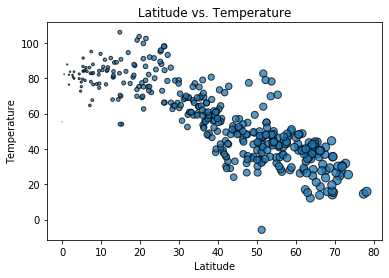

In [9]:
plt.scatter(latitude, temperature, edgecolors="black", s=latitude, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs. Temperature")
plt.savefig('Lat_vs_Temp.png')
plt.show()

The code above plots all of the latitude values against the temperature values to assess visually whether there may be a relationship between the two variables. 

#### Latitude vs. Humidity Plot

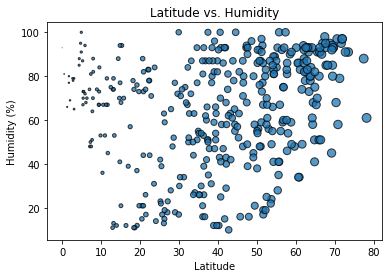

In [10]:
plt.scatter(latitude, humidity, edgecolors="black", s=latitude, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity")
plt.savefig('Lat_vs_Humidity.png')
plt.show()

The code above plots all of the latitude values against the humidity values to assess visually whether there may be a relationship between the two variables.

#### Latitude vs. Cloudiness Plot

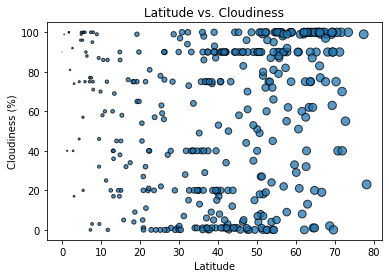

In [11]:
plt.scatter(latitude, cloudiness, edgecolors="black", s=latitude, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness")
plt.savefig('Lat_vs_Cloudiness.png')
plt.show()

The code above plots all of the latitude values against the cloudiness values to assess visually whether there may be a relationship between the two variables.

#### Latitude vs. Wind Speed Plot

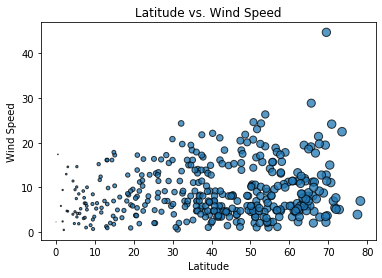

In [12]:
plt.scatter(latitude, wind_speed, edgecolors="black", s=latitude, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")
plt.savefig('Lat_vs_WindSpeed.png')
plt.show()

The code above plots all of the latitude values against the wind speed values to assess visually whether there may be a relationship between the two variables.

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots
def lin_regress(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y, edgecolors="black", s=latitude, alpha=0.75)
    plt.plot(x,regress_values,"r-")

In [14]:
# Create Northern and Southern Hemisphere DataFrames
n_hem = weather_df_clean.loc[(weather_df_clean["Latitude"]>=0)]
n_hem

,Cities,Country,Date Time,Temperature,Latitude,Longitude,Humidity,Cloudiness,Wind Speed
0,Shahrud,IR,1.587620e+09,69.26,36.42,54.98,26.0,86.0,14.03
3,Tateyama,JP,1.587620e+09,64.00,34.98,139.87,55.0,20.0,18.34
4,Yaan,NG,1.587619e+09,78.06,7.38,8.57,81.0,100.0,6.44
5,Batagay-Alyta,RU,1.587620e+09,27.95,67.80,130.41,85.0,99.0,3.33
6,Nome,US,1.587619e+09,28.40,64.50,-165.41,68.0,1.0,5.82
...,...,...,...,...,...,...,...,...,...
550,Adrar,MR,1.587621e+09,77.38,20.50,-10.07,15.0,54.0,7.58
552,Falkenberg,SE,1.587621e+09,46.99,56.91,12.49,75.0,22.0,1.12
553,Erbaa,TR,1.587621e+09,42.80,40.67,36.57,70.0,75.0,4.70
556,Ýpsonas,CY,1.587621e+09,69.01,34.69,32.96,77.0,20.0,14.99


In [15]:
s_hem = weather_df_clean.loc[(weather_df_clean["Latitude"]<0)]
s_hem

,Cities,Country,Date Time,Temperature,Latitude,Longitude,Humidity,Cloudiness,Wind Speed
1,Ushuaia,AR,1.587619e+09,37.40,-54.80,-68.30,78.0,20.0,4.70
2,Kafue,ZM,1.587620e+09,66.56,-15.77,28.18,45.0,19.0,6.98
11,Bredasdorp,ZA,1.587620e+09,44.60,-34.53,20.04,93.0,86.0,1.12
12,São José da Coroa Grande,BR,1.587620e+09,77.65,-8.90,-35.15,84.0,57.0,5.84
14,Rikitea,PF,1.587619e+09,75.94,-23.12,-134.97,76.0,100.0,13.78
...,...,...,...,...,...,...,...,...,...
546,Dunedin,NZ,1.587621e+09,54.00,-45.87,170.50,73.0,73.0,1.81
547,Voh,NC,1.587621e+09,78.03,-20.97,164.70,73.0,6.0,10.87
551,Angoche,MZ,1.587621e+09,76.68,-16.23,39.91,83.0,23.0,7.83
554,Guiratinga,BR,1.587621e+09,66.90,-16.35,-53.76,81.0,80.0,2.04


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

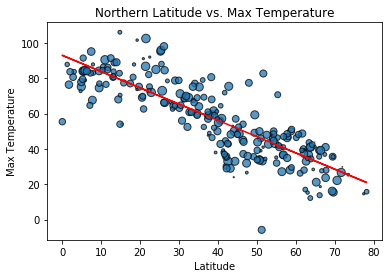

In [16]:
lin_regress(n_hem["Latitude"],n_hem["Temperature"])

plt.title("Northern Latitude vs. Max Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.savefig('NHem_Temp_vs_Latitude_Regression.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

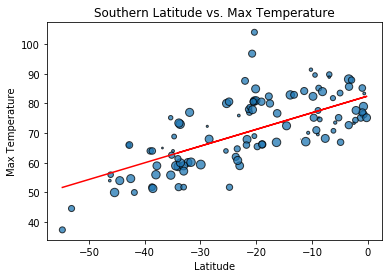

In [17]:
lin_regress(s_hem["Latitude"],s_hem["Temperature"])

plt.title("Southern Latitude vs. Max Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.savefig('SHem_Temp_vs_Latitude_Regression.png')
plt.show()

The Northern and Southern Hemisphere Latitude vs. Max Temperature plots show that there is a very strong relationship between Latitude and Max Temperature. In both of these plots, the temperature is hotter where the latitude is closer to 0. In the northern hemisphere, this is represented as a negative relationship - as the latitude increases (gets further from the Equator) the temperature decreases. In the southern hemisphere, this is represented as a positive relationship - as the latitude increases (gets closer to the Equator) the temperature increases. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

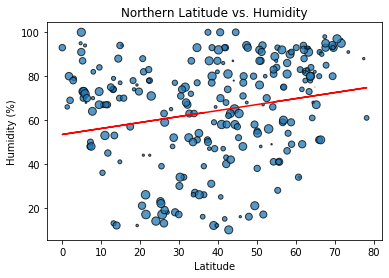

In [18]:
lin_regress(n_hem["Latitude"],n_hem["Humidity"])

plt.title("Northern Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('NHem_Humidity_vs_Latitude_Regression.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

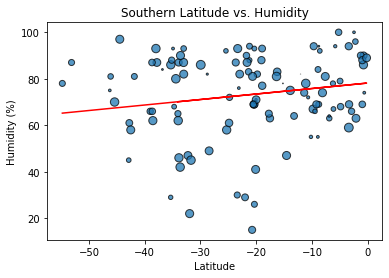

In [19]:
lin_regress(s_hem["Latitude"],s_hem["Humidity"])

plt.title("Southern Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('SHem_Humidity_vs_Latitude_Regression.png')
plt.show()

The Northern and Southern Hemisphere Latitude vs. Humidity plots show that there may be a mild relationship between latitude and humidity, however the plot is inconclusive without additional analyses. In the northern hemisphere, there is a moderate positive relationship between latitude and humidity - as latitude increases humidity tends to increase. However, this relationship is not nearly as evident in the southern hemisphere. These data suggest that there are other variables that affect global humidity other than relative distance from the Equator.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

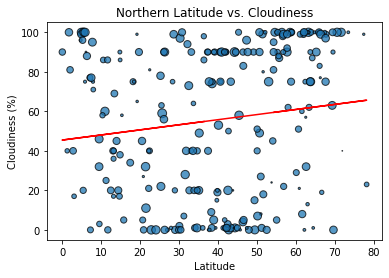

In [20]:
lin_regress(n_hem["Latitude"],n_hem["Cloudiness"])

plt.title("Northern Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('NHem_Cloudiness_vs_Latitude_Regression.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

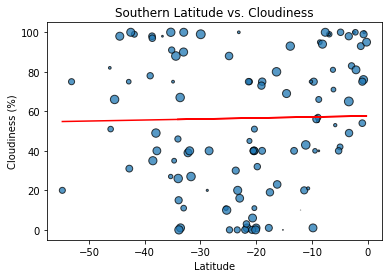

In [21]:
lin_regress(s_hem["Latitude"],s_hem["Cloudiness"])

plt.title("Southern Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('SHem_Cloudiness_vs_Latitude_Regression.png')
plt.show()

The Northern and Southern Hemisphere Latitude vs. Cloudiness plots show that there is likely not a relationship between latitude and cloudiness. As with the relationship between latitude and humidity, there is a slightly stronger relationship in the northern hemisphere than there is in the southern hemisphere, however his relationship is not pronounced in either data set. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

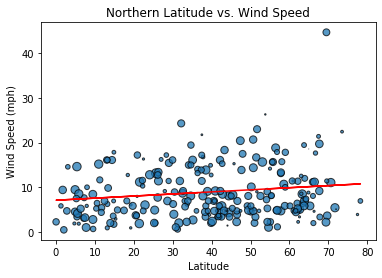

In [22]:
lin_regress(n_hem["Latitude"],n_hem["Wind Speed"])

plt.title("Northern Latitude vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('NHem_WindSpeed_vs_Latitude_Regression.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

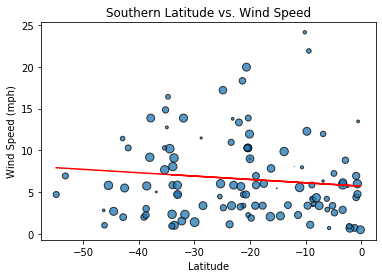

In [23]:
lin_regress(s_hem["Latitude"],s_hem["Wind Speed"])

plt.title("Southern Latitude vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('SHem_WindSpeed_vs_Latitude_Regression.png')
plt.show()

The Northern and Southern Hemisphere Latitude vs. Wind Speed plots show that there is not likely a relationship between latitude and wind speed. In contrast with the humidity and cloudiness data sets, which showed a slightly stronger relationship in the northern hemisphere, these data show a slightly stronger relationship in the southern hemisphere. It is likely that there are variables other than latitude that affect wind speed around the world. 